## Creating Folder

In [1]:
# creating Folder
import os

if not os.path.exists("data"):
    os.makedirs("data")

## Web Scraping

In [2]:
#scraping
import requests
from bs4 import BeautifulSoup

url="https://www.airlinequality.com/"
headers={'User-Agent':'Mozilla/5.0'}
response=requests.get(url,headers=headers)
soup=BeautifulSoup(response.text,"html.parser")

In [3]:
reviews=soup.find_all("div",class_="text_content")
for i,review in enumerate(reviews,1):
    print(f"{i}.{review.text.strip()}\n")

1.✅ Trip Verified |   I was able to make web check in the day before for 3 passengers. The fourth (part of the same booking) was not possible as the web site gave a message that for this flight web… Read more

2.✅ Trip Verified |   I approached this flight with some scepticism but have to confess that I was wrong. Flight was a little (30 min) delayed, but everything else was nice for a Low Cost Carrier; smooth boarding, pleasant and… Read more

3.✅ Trip Verified | Baku to Istanbul old aircraft with bad legroom and my entertainment screen barely worked. Long bus journey to terminal. My bag arrived damaged and they replied that damage has to be reported in the airport in… Read more

4.✅ Trip Verified | The seat is 54 cm wide, but once converted into a bed, it expands to 62 cm, offering enough space to lie flat and sleep without feeling restricted. The bedding provided — including a mattress topper,… Read more

5.Not Verified | I have flown on Alaska Airlines for many years. My experience

In [4]:
#saved as csv
import pandas as pd
data=[{"review": r.text.strip()} for r in reviews]
df=pd.DataFrame(data)
df.to_csv("data/ba_review.csv", index=False)

C:\Users\Sadiya Sajid\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('data/ba_review.csv')

# Check the first few rows of the dataframe
print(df.head())


                                              review
0  ✅ Trip Verified |   I was able to make web che...
1  ✅ Trip Verified |   I approached this flight w...
2  ✅ Trip Verified | Baku to Istanbul old aircraf...
3  ✅ Trip Verified | The seat is 54 cm wide, but ...
4  Not Verified | I have flown on Alaska Airlines...


In [6]:
import re

# Clean function to remove verification status and extra whitespace
def clean_review(text):
    # Remove "✅ Trip Verified" or "Not Verified"
    text = re.sub(r"(✅ Trip Verified|Not Verified)\s*\|\s*", "", text)
    
    # Remove "Read more" or similar endings
    text = re.sub(r"Read more.*", "", text)
    
    # Clean up extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

# Apply cleaning to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_review)

# Check the cleaned reviews
print(df[['review', 'cleaned_review']].head())


                                              review  \
0  ✅ Trip Verified |   I was able to make web che...   
1  ✅ Trip Verified |   I approached this flight w...   
2  ✅ Trip Verified | Baku to Istanbul old aircraf...   
3  ✅ Trip Verified | The seat is 54 cm wide, but ...   
4  Not Verified | I have flown on Alaska Airlines...   

                                      cleaned_review  
0  I was able to make web check in the day before...  
1  I approached this flight with some scepticism ...  
2  Baku to Istanbul old aircraft with bad legroom...  
3  The seat is 54 cm wide, but once converted int...  
4  I have flown on Alaska Airlines for many years...  


In [7]:
from textblob import TextBlob

# Function to get sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify as Positive or Negative based on polarity
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the cleaned reviews
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Check the DataFrame with sentiment
print(df[['review', 'cleaned_review', 'sentiment']].head())


                                              review  \
0  ✅ Trip Verified |   I was able to make web che...   
1  ✅ Trip Verified |   I approached this flight w...   
2  ✅ Trip Verified | Baku to Istanbul old aircraf...   
3  ✅ Trip Verified | The seat is 54 cm wide, but ...   
4  Not Verified | I have flown on Alaska Airlines...   

                                      cleaned_review sentiment  
0  I was able to make web check in the day before...  Positive  
1  I approached this flight with some scepticism ...  Positive  
2  Baku to Istanbul old aircraft with bad legroom...  Negative  
3  The seat is 54 cm wide, but once converted int...  Negative  
4  I have flown on Alaska Airlines for many years...  Positive  


## Visualization

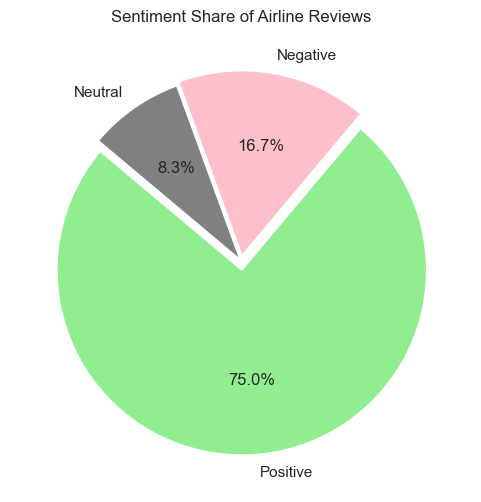

In [23]:
# Pie chart
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightgreen', 'pink', 'gray'],
    startangle=140,
    explode=(0.05, 0.03, 0.01)
)
plt.title('Sentiment Share of Airline Reviews')
plt.ylabel('')
plt.show()


In [14]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_words(sentiment, n=10):
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_review']).lower()
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [w for w in words if w not in stop_words and len(w) > 2]
    return Counter(filtered_words).most_common(n)


[nltk_data] Downloading package stopwords to C:\Users\Sadiya
[nltk_data]     Sajid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


C:\Users\Sadiya Sajid\AppData\Local\Temp\ipykernel_37300\200308230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


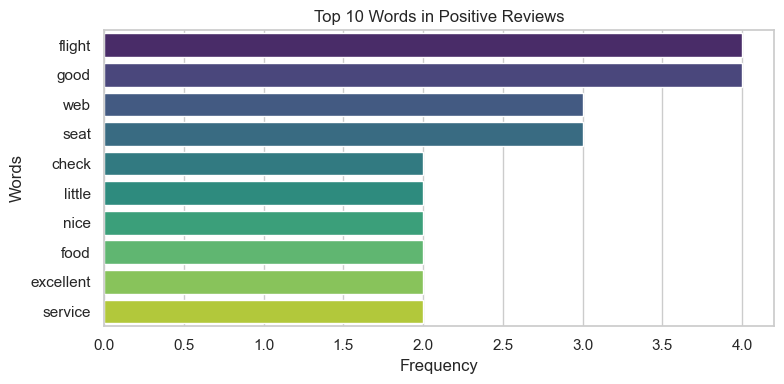

C:\Users\Sadiya Sajid\AppData\Local\Temp\ipykernel_37300\200308230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


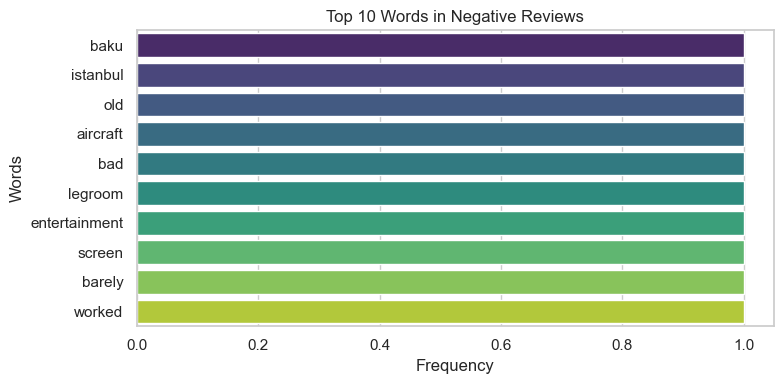

C:\Users\Sadiya Sajid\AppData\Local\Temp\ipykernel_37300\200308230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


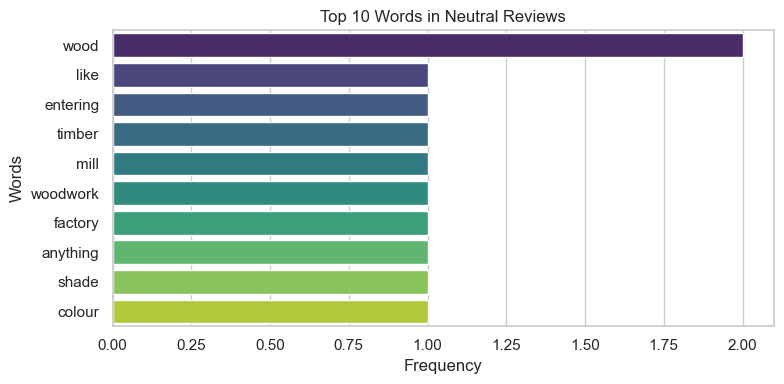

In [15]:
def plot_top_words(sentiment, n=10):
    top_words = get_top_words(sentiment, n)
    words, counts = zip(*top_words)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Top {n} Words in {sentiment} Reviews")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

# Generate plots
for sentiment in ['Positive', 'Negative', 'Neutral']:
    plot_top_words(sentiment)
